Question 1:

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Filter out NaN values from flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# List of species in the dataset
species_list = penguins['species'].unique()

# Create a histogram for each species
fig = go.Figure()

for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']

    # Calculate statistical values
    mean_flipper = species_data.mean()
    median_flipper = species_data.median()
    min_flipper = species_data.min()
    max_flipper = species_data.max()
    iqr_flipper = np.percentile(species_data, 75) - np.percentile(species_data, 25)
    std_flipper = species_data.std()
    lower_bound_2std = mean_flipper - 2 * std_flipper
    upper_bound_2std = mean_flipper + 2 * std_flipper

    # Add histogram to the figure
    fig.add_trace(go.Histogram(
        x=species_data,
        name=f'{species}',
        opacity=0.6,
        nbinsx=20
    ))

    # Add vertical lines (mean and median)
    fig.add_vline(x=mean_flipper, line=dict(color='green', width=2, dash='dash'), annotation_text=f'Mean {species}', annotation_position="top left")
    fig.add_vline(x=median_flipper, line=dict(color='blue', width=2, dash='dash'), annotation_text=f'Median {species}', annotation_position="top right")

    # Add rectangles for IQR and ±2 standard deviations
    fig.add_hrect(
        y0=0, y1=species_data.max(),
        x0=np.percentile(species_data, 25), x1=np.percentile(species_data, 75),
        fillcolor="lightblue", opacity=0.3, line_width=0,
        annotation_text=f'IQR {species}', annotation_position="top left"
    )
    fig.add_hrect(
        y0=0, y1=species_data.max(),
        x0=lower_bound_2std, x1=upper_bound_2std,
        fillcolor="orange", opacity=0.2, line_width=0,
        annotation_text=f'±2 Std Dev {species}', annotation_position="top right"
    )

# Update layout for better visualization
fig.update_layout(
    title="Flipper Length Distribution with Mean, Median, IQR, and ±2 Standard Deviations",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay'
)

# Show the plot
fig.show()


Question 2:

/tmp/ipykernel_52/1780799428.py:33: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_52/1780799428.py:33: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_52/1780799428.py:33: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




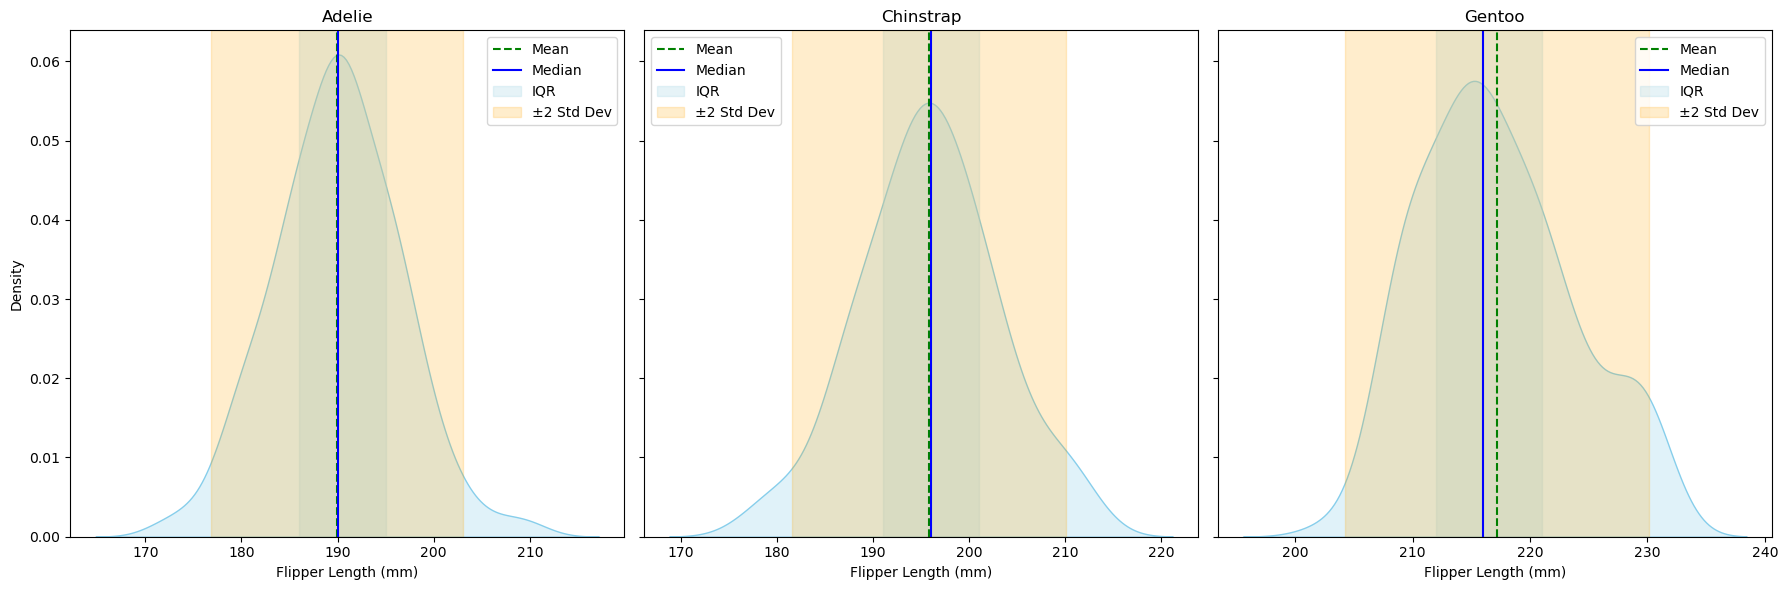

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Filter out NaN values from flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# List of species in the dataset
species_list = penguins['species'].unique()

# Create a figure with 3 subplots (one for each species)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistical values
    mean_flipper = species_data.mean()
    median_flipper = species_data.median()
    min_flipper = species_data.min()
    max_flipper = species_data.max()
    iqr_flipper = np.percentile(species_data, 75) - np.percentile(species_data, 25)
    lower_bound_iqr = np.percentile(species_data, 25)
    upper_bound_iqr = np.percentile(species_data, 75)
    std_flipper = species_data.std()
    lower_bound_2std = mean_flipper - 2 * std_flipper
    upper_bound_2std = mean_flipper + 2 * std_flipper

    # KDE plot for the current species
    sns.kdeplot(species_data, ax=axes[i], shade=True, color='skyblue')

    # Add vertical lines for mean and median
    axes[i].axvline(mean_flipper, color='green', linestyle='--', label='Mean')
    axes[i].axvline(median_flipper, color='blue', linestyle='-', label='Median')
    
    # Add shaded regions for IQR and ±2 standard deviations
    axes[i].axvspan(lower_bound_iqr, upper_bound_iqr, alpha=0.3, color='lightblue', label='IQR')
    axes[i].axvspan(lower_bound_2std, upper_bound_2std, alpha=0.2, color='orange', label='±2 Std Dev')
    
    # Customize the plot
    axes[i].set_title(f'{species}')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend()

# Set the y-axis label for the leftmost plot
axes[0].set_ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()


Question 3:
https://chatgpt.com/share/66f5fb4b-7068-800d-8b89-07d6a529e0bc

Question 4:
data1 and data3 have similar means - both around 5 and similar variances.

data1, data2, and data3 have similar means - close to 5, but data2 has a much smaller variance compared to data1 and data3.

None of the datasets have similar variances but different means. 

data4 has both a different mean and a much smaller variance compared to the other datasets

In [4]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 5:
https://chatgpt.com/share/66f60012-9980-800d-a4a9-75301fa9d730
If a skew is positive, the mean is typically greater than the median
If a skew is negative, the mean is typically less than the median

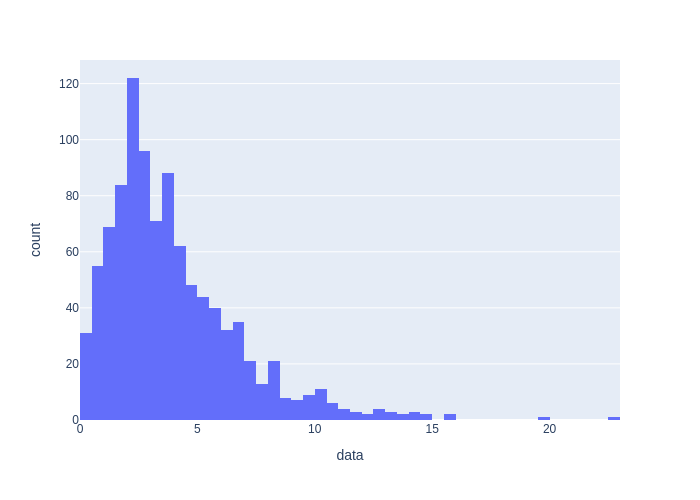

Right-skewed data: Mean = 3.9614700929279674, Median = [3.26947608]


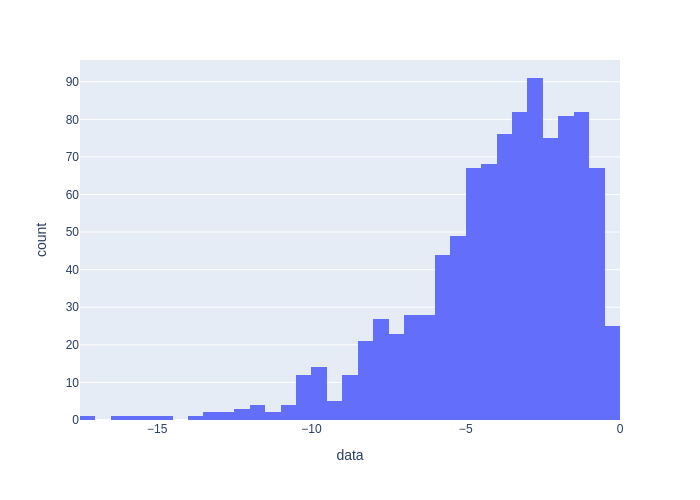

Left-skewed data: Mean = -4.009432807490779, Median = [-3.48638427]


In [7]:
# Import necessary libraries
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Right-skewed data (positive skew)
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Histogram for right-skewed data
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.show(renderer="png")

# Calculate mean and median for right-skewed data
mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])

print(f"Right-skewed data: Mean = {mean1}, Median = {median1}")

# Left-skewed data (negative skew)
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Histogram for left-skewed data
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")

# Calculate mean and median for left-skewed data
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])

print(f"Left-skewed data: Mean = {mean2}, Median = {median2}")


Question 6:


In [8]:
# Maybe something like this? Feel free to use this one 
# if it strikes your fancy after look around a bit
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [9]:
df.describe()

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (% daily value),saturated fat (g),saturated fat (% daily value),trans fat (g),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
count,750.000000,750.000000,750.00000,395.000000,750.000000,260.000000,260.000000,637.000000,260.000000,637.000000,...,750.000000,260.000000,750.000000,260.000000,637.000000,750.000000,637.000000,637.000000,637.000000,637.000000
mean,2126.666667,113.685333,374.50000,10.612996,296.149333,127.096154,21.815385,3.409105,29.965385,0.603297,...,69.574667,15.780769,1.717333,6.530769,25.718995,11.398400,13.430141,7.954474,17.725275,8.819466
std,897.234043,9.956229,216.65064,7.286159,209.034366,127.875914,21.885199,4.972504,26.639209,1.193182,...,65.719590,9.419544,2.075374,6.307057,24.530455,11.119111,20.250714,21.220825,15.739473,10.229923
min,1000.000000,100.000000,0.00000,0.035274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,106.000000,187.25000,5.200000,150.000000,20.000000,3.750000,0.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.000000,3.000000,4.000000,0.000000,4.000000,0.000000
50%,2000.000000,111.000000,374.50000,10.158912,260.000000,100.000000,17.000000,0.200000,24.000000,0.000000,...,48.000000,15.000000,1.000000,5.000000,18.000000,9.000000,8.000000,0.000000,15.000000,6.000000
75%,3000.000000,123.000000,561.75000,16.000000,410.000000,200.000000,35.000000,6.000000,48.000000,0.500000,...,85.750000,20.000000,3.000000,10.000000,41.000000,16.000000,15.000000,6.000000,30.000000,15.000000
max,3000.000000,130.000000,749.00000,32.000000,1880.000000,1060.000000,182.000000,30.000000,102.000000,9.000000,...,340.000000,47.000000,21.000000,28.000000,128.000000,118.000000,170.000000,240.000000,70.000000,50.000000


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)

# Summary statistics
summary_stats = df.describe()

# Visualizations

# 1. Distribution of Calories
plt.figure(figsize=(8, 6))
plt.hist(df['Calories'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Calories vs. Total Fat
plt.figure(figsize=(8, 6))
plt.scatter(df['Calories'], df['Total Fat'], alpha=0.6)
plt.title('Calories vs. Total Fat')
plt.xlabel('Calories')
plt.ylabel('Total Fat (g)')
plt.grid(True)
plt.show()

# 3. Sodium and Sodium Daily Value
plt.figure(figsize=(8, 6))
plt.scatter(df['Sodium'], df['Sodium (% Daily Value)'], alpha=0.6)
plt.title('Sodium vs. Sodium Daily Value')
plt.xlabel('Sodium (mg)')
plt.ylabel('Sodium (% Daily Value)')
plt.grid(True)
plt.show()

# 4. Protein Content Distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Protein'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Protein Content')
plt.xlabel('Protein (g)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Display the summary statistics
import ace_tools as tools; tools.display_dataframe_to_user(name="Summary Statistics of Nutrition Data", dataframe=summary_stats)


KeyError: 'Calories'

<Figure size 800x600 with 0 Axes>

Question 7:

In [ ]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

Question 8:
https://chatgpt.com/share/66f6041d-9a64-800d-9a5d-5c59318c6942

In [ ]:
import plotly.express as px

# Assuming you have a DataFrame `bn` with the necessary columns
fig = px.scatter(bn, 
                 x="percent change", 
                 y="rank", 
                 animation_frame="year", 
                 animation_group="name", 
                 size="percent", 
                 color="sex", 
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005, 0.005])

fig.update_yaxes(autorange='reversed')  # Optional: if you want to reverse the y-axis for ranks
fig.show(renderer="png")


Question 9:
Yes